In [1]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)



In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')


In [4]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [5]:
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [6]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)


Epoch 1/400
0s - loss: 55810.2070
Epoch 2/400
0s - loss: 35393.0165
Epoch 3/400
0s - loss: 22823.3970
Epoch 4/400
0s - loss: 12174.4508
Epoch 5/400
0s - loss: 5329.1178
Epoch 6/400
0s - loss: 2149.4995
Epoch 7/400
0s - loss: 1237.4858
Epoch 8/400
0s - loss: 1094.3906
Epoch 9/400
0s - loss: 1071.8072
Epoch 10/400
0s - loss: 1062.6851
Epoch 11/400
0s - loss: 1049.2871
Epoch 12/400
0s - loss: 1057.6290
Epoch 13/400
0s - loss: 1052.6171
Epoch 14/400
0s - loss: 1047.1717
Epoch 15/400
0s - loss: 1045.6052
Epoch 16/400
0s - loss: 1037.5884
Epoch 17/400
0s - loss: 1044.7810
Epoch 18/400
0s - loss: 1042.3619
Epoch 19/400
0s - loss: 1078.4392
Epoch 20/400
0s - loss: 1047.1072
Epoch 21/400
0s - loss: 1032.0883
Epoch 22/400
0s - loss: 1046.8043
Epoch 23/400
0s - loss: 1061.8940
Epoch 24/400
0s - loss: 1020.6266
Epoch 25/400
0s - loss: 1015.4773
Epoch 26/400
0s - loss: 1021.7744
Epoch 27/400
0s - loss: 997.6046
Epoch 28/400
0s - loss: 1006.3209
Epoch 29/400
0s - loss: 987.2312
Epoch 30/400
0s - los

0s - loss: 549.9624
Epoch 247/400
0s - loss: 539.1571
Epoch 248/400
0s - loss: 535.3683
Epoch 249/400
0s - loss: 518.0279
Epoch 250/400
0s - loss: 523.3088
Epoch 251/400
0s - loss: 521.4142
Epoch 252/400
0s - loss: 529.3020
Epoch 253/400
0s - loss: 544.6536
Epoch 254/400
0s - loss: 530.1853
Epoch 255/400
0s - loss: 513.8574
Epoch 256/400
0s - loss: 526.7901
Epoch 257/400
0s - loss: 533.6014
Epoch 258/400
0s - loss: 517.6269
Epoch 259/400
0s - loss: 514.9891
Epoch 260/400
0s - loss: 541.2769
Epoch 261/400
0s - loss: 503.8995
Epoch 262/400
0s - loss: 524.4679
Epoch 263/400
0s - loss: 513.9166
Epoch 264/400
0s - loss: 509.1698
Epoch 265/400
0s - loss: 529.4675
Epoch 266/400
0s - loss: 567.8638
Epoch 267/400
0s - loss: 504.8608
Epoch 268/400
0s - loss: 534.8179
Epoch 269/400
0s - loss: 535.7908
Epoch 270/400
0s - loss: 533.1702
Epoch 271/400
0s - loss: 528.7005
Epoch 272/400
0s - loss: 527.4484
Epoch 273/400
0s - loss: 540.2307
Epoch 274/400
0s - loss: 513.0011
Epoch 275/400
0s - loss: 508

In [7]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 566.09 MSE (23.79 RMSE)
Test Score: 2250.45 MSE (47.44 RMSE)


In [8]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [9]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


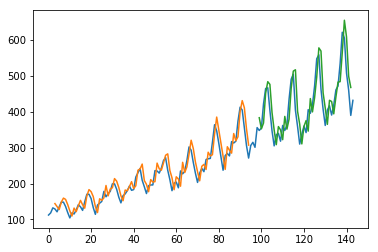

In [10]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
